# Machine Learning: Introdução a classificação com SKLearn

# Aula 4 - Support Vector Machine (SVM) e não linearidade

In [1]:
# Importando Pandas, os dados por meio da base de dados salva na aula 3 e visualizando o cabeçalho com os dados importados
import pandas as pd

dados = pd.read_csv('dados/intro_ML_webdev_data.csv')
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [2]:
# Importando as demais bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Rodando novamente o modelo da aula 3, mas dessa vez configurarmos np.random.seed() como SEED, para que não precisemos mais
# passa-lo para train_test_split() ou para LinearSVC(), pois estamos utilizando o Numpy de forma fixa. O parâmetro dual=False
# é por conta da versão mais nova da biblioteca, impede um warning de convergência que ocorre
SEED = 5
np.random.seed(SEED)

x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC(dual=False)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.93%


In [4]:
# No módulo sklearn.smv, teremos diversas variações de algoritmos baseados em uma única ideia: Suport Vector Machines, isto é,
# SVM. Estávamos utilizando anteriormente o LinearSVC, ou Suport Vector Classification, que é baseado em relacionamentos 
# lineares. Queremos utilizar um algoritmo mais independente e que encontre relacionamentos diferentes, portanto tentaremos o 
# SVC.
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


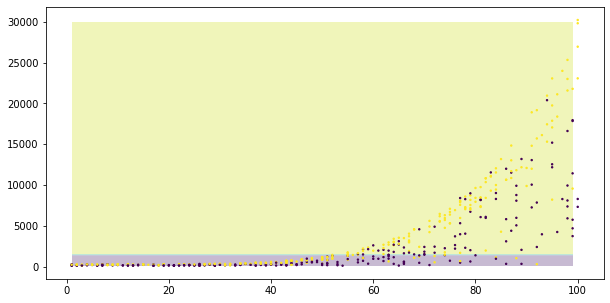

In [5]:
# O resultado estimador SVC foi pior que o do LinearSVC. Vamos plotar um gráfico com a fronteira de decisão para visualizar
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10,5))

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=2)

# DECISION BOUNDARY

In [6]:
# Esses algoritmos são muito suscetíveis a escala, e darão menos valor para variações menores, como é o caso de X. Escalas 
# distintas em features causam um desbalanço no algoritmo. Uma alternativa para solucionarmos esse problema é reescalarmos 
# todo o nosso projeto para uma faixa similar. Faremos isso utilizando o escalador padrão do Sklearn, o stadardscaler, que é 
# uma fase de pré-processamento e padronização de valores.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# Utilizando o scaler. Note que os dados foram alterados para raw_treino_x e raw_treino_y, para retornar treino_x e teste_x
# escalonados adequadamente.
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


In [7]:
# Tivemos uma taxa de acerto ainda melhor que a do LinearSVC(), mas ainda precisamos visualizar isso em um gráfico. Tivemos 
# uma taxa de acerto ainda melhor que a do LinearSVC(), mas ainda precisamos visualizar isso em um gráfico:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# DECISION BOUNDARY

AttributeError: 'numpy.ndarray' object has no attribute 'horas_esperadas'

In [8]:
# O algoritmo acima retorna erros, porque o retorno do Scaler é um array com arrays, onde cada coluna é uma feature dos dados
# de treino e de teste. 
treino_x

array([[-1.20810685, -0.58850785],
       [-0.25992095, -0.48069545],
       [ 1.46086087,  0.13548927],
       ...,
       [-0.57598292, -0.58492075],
       [ 1.21503489,  0.45294796],
       [ 1.1799169 ,  1.18670998]])

In [9]:
teste_x

array([[-0.50574693, -0.56359741],
       [ 1.74180484,  0.84394228],
       [ 1.46086087,  0.94856614],
       ...,
       [ 0.93409092, -0.4800976 ],
       [ 0.40732098, -0.16243963],
       [-1.03251687, -0.59269281]])

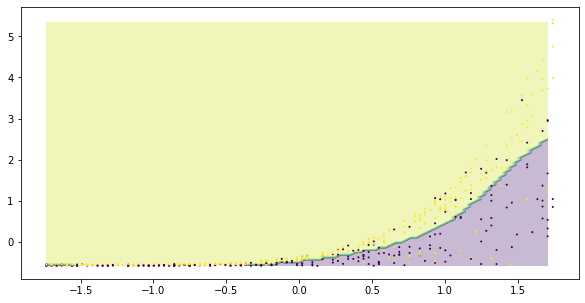

In [10]:
# Portanto, acessamos eles usando comandos para acesso de colunas de uma matriz do Numpy.
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

### Por mais que LinearSVC obete uma acurácia de 55.98% e uma a linha de decisão na plotagem horrível. Já o SVC com um comportamento não linear parece uma opção melhor: temos uma curva de decisão bem marcada e o estimador possui e taxa de acerto de 66.85%

### OBS: A porcentagem de acerto pode variar de acordo com a versão utilizada das bibliotecas